In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from mpl_toolkits import mplot3d

# Data Visualization using 2D and 3D plots

In [19]:
data=pd.read_csv("binary_classification_train.csv")
data
m,n=data.shape

In [20]:
def z_score_normalisation(dta):
    mean=np.mean(dta,axis=0)
    std=np.std(dta,axis=0)
    dta=(dta-mean)/std
    return dta

<function matplotlib.pyplot.show(close=None, block=None)>

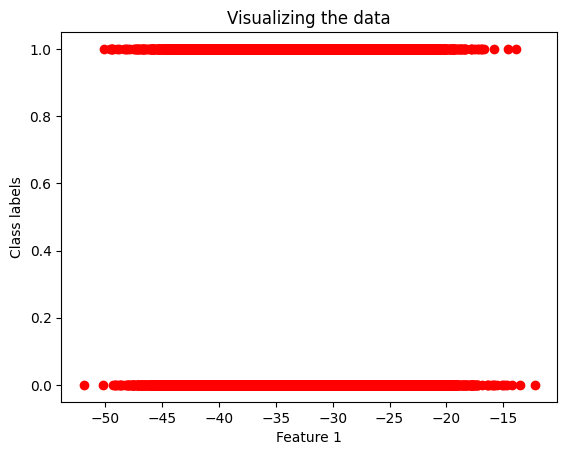

In [21]:
x=data.iloc[:,1:2].values
y=data.iloc[:,n-1:n].values
plt.scatter(x,y,color='red')
plt.title("Visualizing the data")
plt.xlabel("Feature 1")
plt.ylabel("Class labels")
plt.legend
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

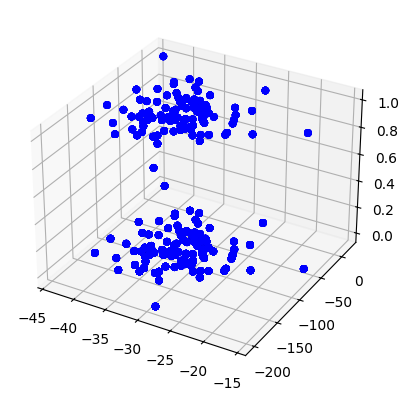

In [22]:
x_3d=data.iloc[:,1:3].values
ax=plt.axes(projection='3d')
ax.scatter(x_3d[:100,0],x_3d[:100,1],y[:100],color='b')   #plotting the first 1000 examples
plt.show

In [23]:
def sigmoid(z):
    g_z  = 1/(1+np.exp(-z))
    return g_z

In [24]:
def cost(x_tr,y_tr,w,b, sigmoid):
    m=x_tr.shape[0]
    f_wb=sigmoid(np.dot(x_tr,w)+b)
    err=y_tr*np.log(f_wb)+(1-y_tr)*np.log(1-f_wb)
    total_cost=-(np.sum(err)/m)
    return total_cost

In [25]:
def gradient(x_tr, y_tr, w, b):
    m=x_tr.shape[0]
    predictions=np.dot(x_tr, w)+b
    errors=predictions-y_tr
    dj_dw = np.dot(x_tr.T, errors) / m
    dj_db = np.sum(errors) / m          

    return dj_dw, dj_db

In [26]:
def grad_descent(x_tr, y_tr, alpha, iters, w_in, b_in, cost, gradient, sigmoid):
    j = []
    m,n = x_tr.shape
    w = w_in[:,np.newaxis]
    b = b_in
    j.append(cost(x_tr,y_tr,w,b,sigmoid))
    for i in range(iters):
        g1, g2 = gradient(x_tr, y_tr, w,b)
        w = w - alpha*g1
        b = b - alpha*g2

        if i < 100000:
            j.append(cost(x_tr, y_tr, w,b,sigmoid))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iters/10) == 0:
            print(f"Iteration {i}: Cost {j[-1]}")

    return w,b

In [27]:
def predict(x_tr, w,b, sigmoid):
    y_hat = np.zeros(x_tr.shape[0])
    for i in range(x_tr.shape[0]):
        p = sigmoid(np.dot(x_tr[i,:],w)+b)
        if p>= 0.5:
            y_hat[i] = 1
        else:
            y_hat[i] = 0
    return y_hat

In [30]:
#_main_
data = pd.read_csv("binary_classification_train.csv")
m,n=data.shape
x = data.iloc[:,1:n-1].to_numpy()
y_tr = data.iloc[:,n-1:n].to_numpy()
x_tr=z_score_normalisation(x)
alpha = 0.01
iters = 10000
w_in = np.zeros(x_tr.shape[1])
b_in = 0

w_fin, b_fin = grad_descent(x_tr, y_tr, alpha, iters, w_in, b_in, cost, gradient, sigmoid)

prediction = predict(x_tr, w_fin, b_fin, sigmoid)
for i in range(x_tr.shape[0]):
    print(f"prediction: {prediction[i]}, target: {y_tr[i]}")

Iteration 0: Cost 0.6907894842700596
Iteration 1000: Cost 0.6438565091528439
Iteration 2000: Cost 0.6438440103720104
Iteration 3000: Cost 0.6438435026596538
Iteration 4000: Cost 0.6438434851238054
Iteration 5000: Cost 0.6438434845169418
Iteration 6000: Cost 0.6438434844959282
Iteration 7000: Cost 0.6438434844952005
Iteration 8000: Cost 0.6438434844951753
Iteration 9000: Cost 0.6438434844951743
prediction: 1.0, target: [0]
prediction: 1.0, target: [1]
prediction: 1.0, target: [0]
prediction: 0.0, target: [0]
prediction: 1.0, target: [0]
prediction: 1.0, target: [0]
prediction: 0.0, target: [0]
prediction: 1.0, target: [0]
prediction: 1.0, target: [0]
prediction: 1.0, target: [0]
prediction: 1.0, target: [1]
prediction: 0.0, target: [0]
prediction: 0.0, target: [0]
prediction: 1.0, target: [1]
prediction: 1.0, target: [0]
prediction: 1.0, target: [0]
prediction: 0.0, target: [0]
prediction: 1.0, target: [0]
prediction: 0.0, target: [0]
prediction: 0.0, target: [0]
prediction: 1.0, target

# Calculating F1 score.

In [46]:
tp,tn,fp,fn=0,0,0,0
for i in range(len(y_tr)):
    if prediction[i]==1 and y_tr[i]==1:
        tp+=1
    elif prediction[i]==1 and y_tr[i]==0:
        fp+=1
    elif prediction[i]==0 and y_tr[i]==1:
        fn+=1
    elif prediction[i]==0 and y_tr[i]==0:
        tn+=1
    else:
        continue

precision=(tp/(tp+fp))
recall=(tp/(tp+fn))
f1_score=(2*precision*recall)/(precision+recall)
print("f1 score: ",f1_score)

f1 score:  0.5412024708802057
